# The problem of local shapes

- Detecting salient shapes
- Comparing everything with everything
- Seems pretty unfeasible, but there are some efficiency improvements available

## The solution: Matrix profile

<img src="https://miro.medium.com/max/962/1*E1jkPS6DbqgoR-1tpr3lyA.gif" width=45%>

<img src="https://www.researchgate.net/publication/341191860/figure/fig1/AS:888243306373121@1588785115453/Overview-of-the-Matrix-Profile_W640.jpg" width=45%>

More on matrix profile [here](https://www.youtube.com/watch?v=T9_z7EpA8QM) and [here](https://matrixprofile.docs.matrixprofile.org/examples/NYC_Taxis.html).

## Further addon: Pan-matrix profile
- Assuming a window size is a problem, why not try all?

<img src="https://www.researchgate.net/publication/341191860/figure/fig3/AS:888243306377216@1588785115595/The-pan-Matrix-Profile-of-the-time-series-in-Figure-2_W640.jpg" width=65%>

[PMP paper](https://www.cs.ucr.edu/~eamonn/PAN_SKIMP%20%28Matrix%20Profile%20XX%29.pdf)



In [ ]:
!wget https://gitlab.com/andras.simonyi/10_days_AI_training_data/raw/master/AirPassengers.csv?inline=false -O AirPassengers.csv

--2021-07-29 12:47:10--  https://gitlab.com/andras.simonyi/10_days_AI_training_data/raw/master/AirPassengers.csv?inline=false
Resolving gitlab.com (gitlab.com)... 172.65.251.78
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘AirPassengers.csv’

AirPassengers.csv       [ <=>                ]   1.71K  --.-KB/s    in 0s      

2021-07-29 12:47:11 (46.3 MB/s) - ‘AirPassengers.csv’ saved [1746]



In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("AirPassengers.csv",header=0)

In [ ]:
reindexed_df = df.copy()
reindexed_df.Month = reindexed_df.Month.astype('datetime64[ns]')
reindexed_df = reindexed_df.set_index("Month")


<AxesSubplot:xlabel='Month'>

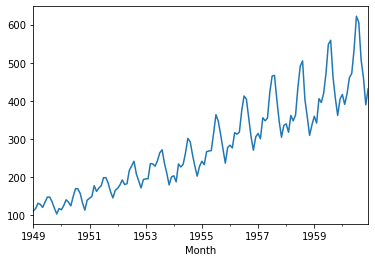

In [ ]:
reindexed_df["#Passengers"].plot()

In [ ]:
!pip install matrixprofile > /dev/null

In [ ]:
import matrixprofile as mp

from matplotlib import pyplot as plt
%matplotlib inline

## Discovering motifs

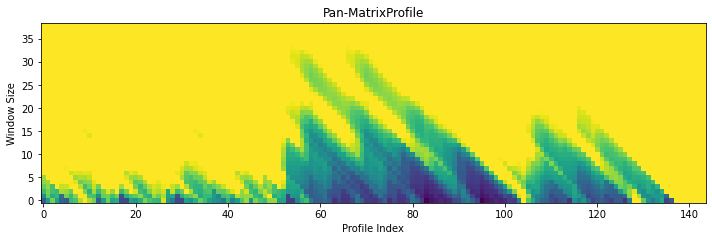

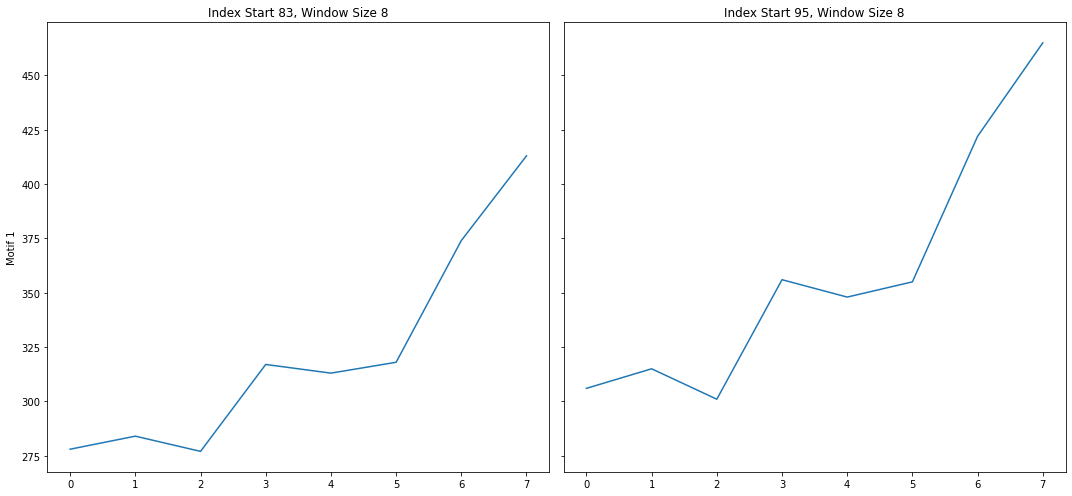

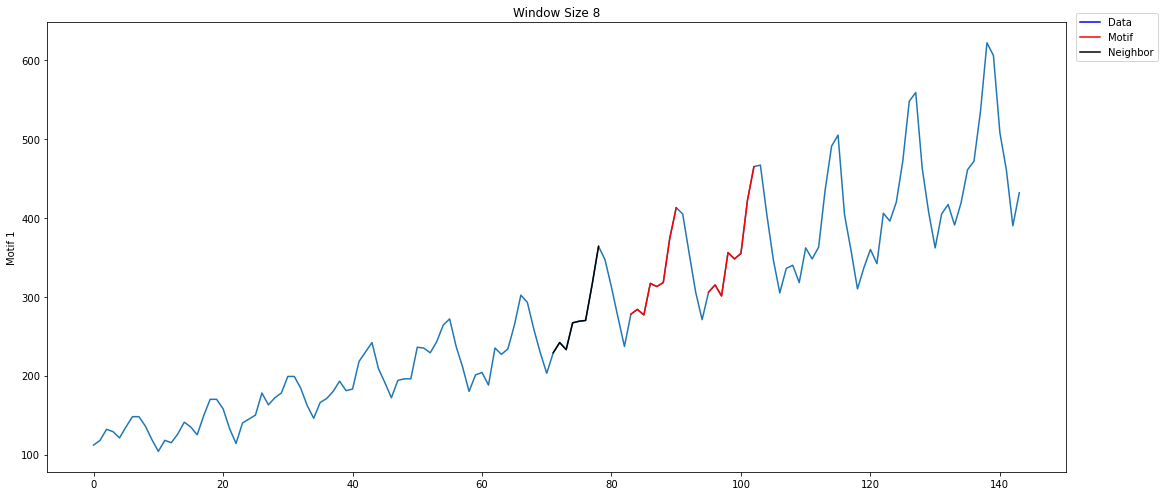

In [ ]:
new_profile = mp.compute(reindexed_df["#Passengers"].values)#, windows=[10,11,12,13,14])
motifs_profile = mp.discover.motifs(new_profile, k=1)
figures = mp.visualize(motifs_profile)

## Discovering discords

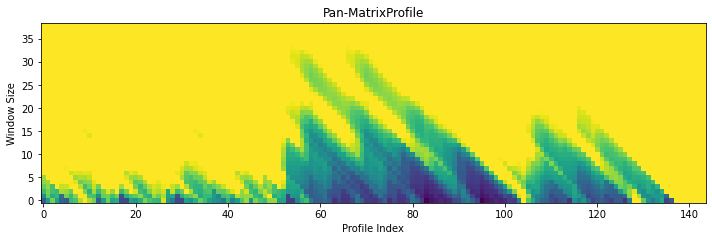

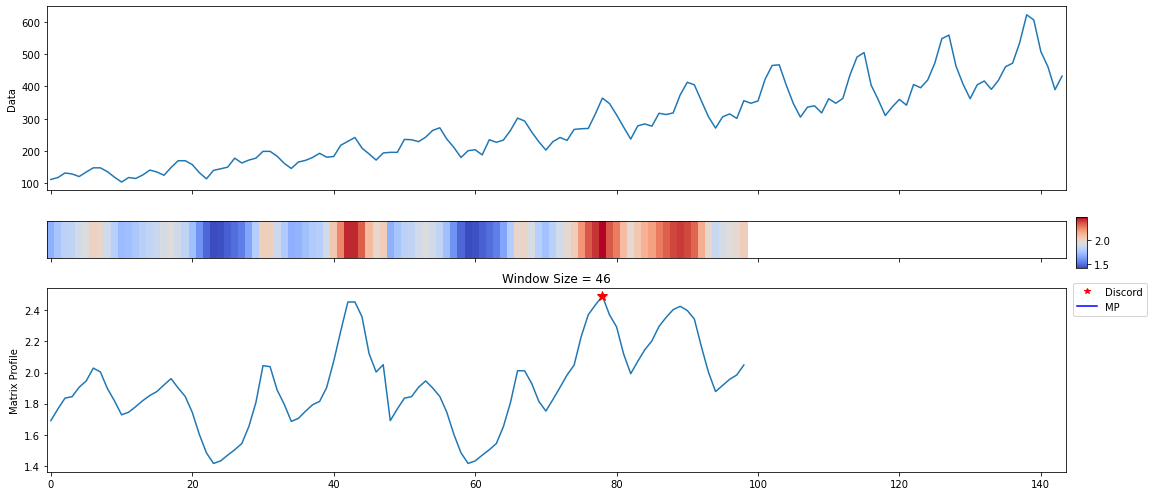

In [ ]:
new_profile = mp.compute(reindexed_df["#Passengers"].values)
discord_profile = mp.discover.discords(new_profile, k=1)
figures = mp.visualize(discord_profile)


## Discovering typical snippets

[{'index': 96, 'snippet': array([315., 301., 356., 348., 355., 422., 465., 467., 404., 347., 305.,
       336.]), 'neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 17, 18, 19, 23, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143], 'fraction': 0.803030303030303}, {'index': 48, 'snippet': array([196., 196., 236., 235., 229., 243., 264., 272., 237., 211., 180.,
       201.]), 'neighbors': [12, 13, 14, 20, 21, 22, 24, 25, 26, 27, 28, 44, 45, 46, 47, 48, 49, 50, 51, 52, 77, 101, 125, 126, 127, 128, 129, 130], 'fraction': 0.21212121212121213}]


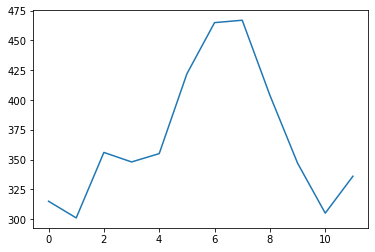

In [ ]:
snippets_list = mp.discover.snippets(reindexed_df["#Passengers"].values, snippet_size=12)
plt.plot(snippets_list[0]["snippet"])
print(snippets_list)

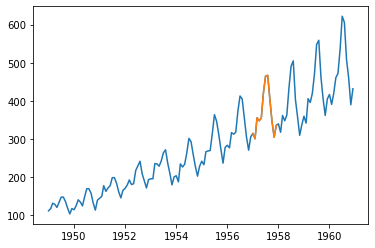

In [ ]:
plt.plot(reindexed_df["#Passengers"])
plt.plot(reindexed_df["#Passengers"].index[96:96+12],snippets_list[0]["snippet"])

## "Complete" analysis with PMP

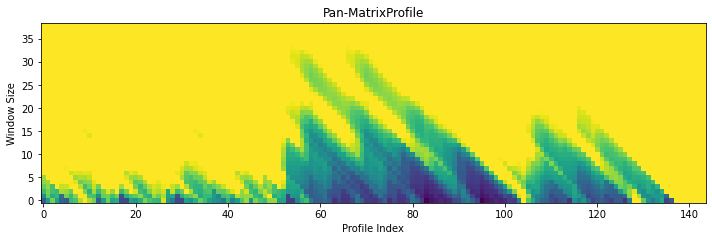

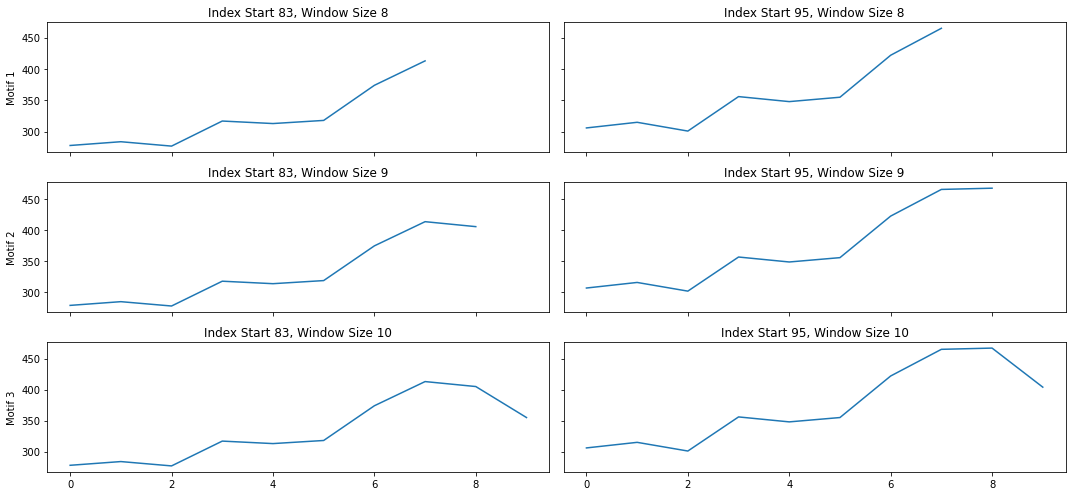

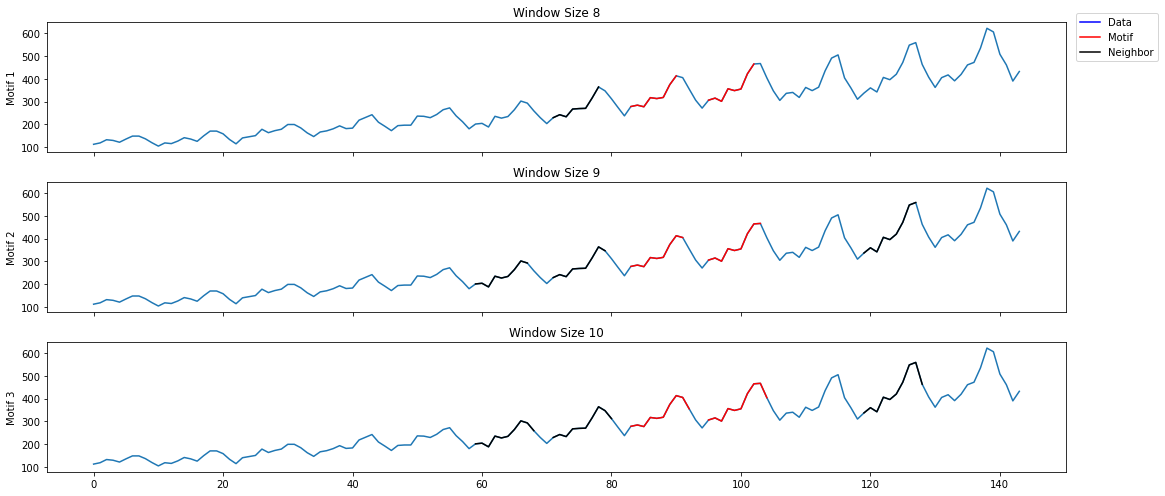

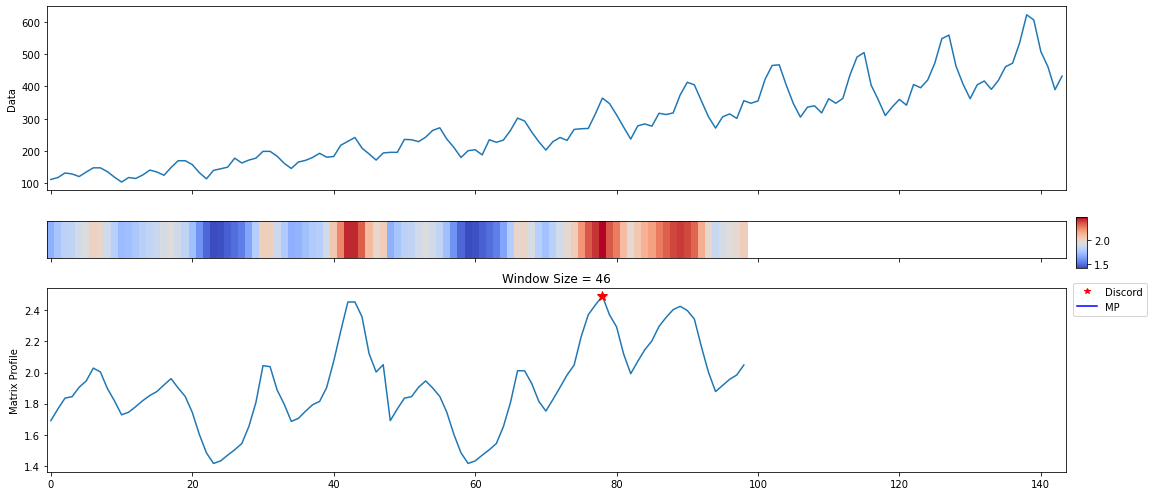

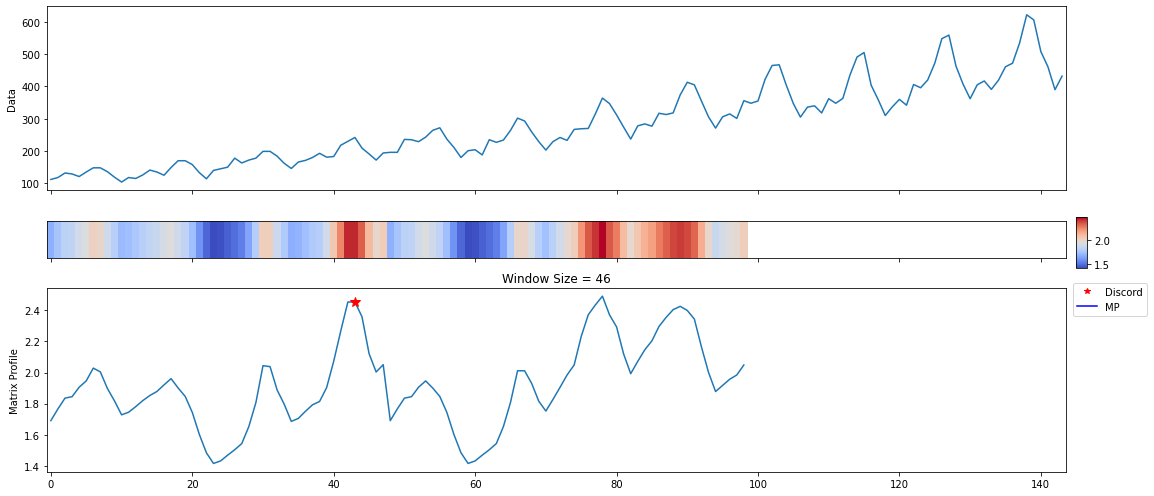

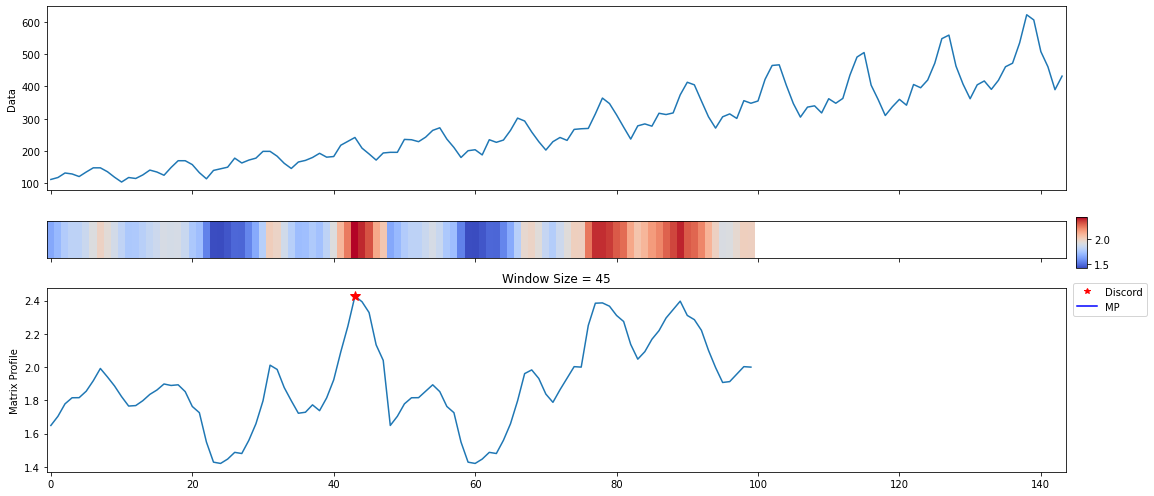

In [ ]:
profile, figures = mp.analyze(reindexed_df["#Passengers"].values, n_jobs=-1)


In [ ]:
# The problem with euclidean distance

## Solution: DTW

## See more: https://towardsdatascience.com/an-illustrative-introduction-to-dynamic-time-warping-36aa98513b98